In [116]:
import tensorflow_datasets as tfds
from tensorflow.python.data.ops.dataset_ops import PrefetchDataset

In [117]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

train_dataset: PrefetchDataset = dataset['train']
test_dataset: PrefetchDataset = dataset['test']

In [118]:
data = tfds.as_dataframe(test_dataset, metadata)

In [119]:
import math
import numpy as np
import pandas as pd

In [120]:
for image, label in tfds.as_numpy(test_dataset):
    image= image.ravel().tolist()
    print(type(image), image, label)
    break

<class 'list'> [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 71, 172, 121, 117, 117, 175, 130, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 166, 140, 112, 190, 180, 145, 164, 12, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 133, 171, 158, 79, 125, 59, 125, 188, 159, 69, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 80, 133, 145, 135, 119, 137, 124, 193, 133, 158, 129, 132, 151, 140, 129, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 41, 148, 124, 114, 104, 116, 109, 96, 156, 132, 104, 112, 112, 117, 125, 158, 121, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124, 137, 124, 124, 119, 121, 116, 111, 125, 117, 112, 119, 122, 119, 127, 130, 145, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 138, 137, 137, 137, 125, 124, 122, 117, 127, 116, 121, 122, 135, 142, 148, 137, 151, 48, 0, 1, 0, 0, 0, 0, 0, 0, 0, 22, 163, 129, 132, 163, 130, 119, 119, 109, 124, 112, 109, 114, 125, 143, 159, 145, 151, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 174, 119, 151, 169, 119, 109, 106, 98, 116, 108, 106, 114, 117, 132, 166, 156, 138,

In [121]:
class_names = [
    'Футболка / топ', "Шорты", "Свитер", "Платье",
    "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
    "Ботинок"]
data_reshaped = pd.DataFrame([image.ravel().tolist() for image, label in tfds.as_numpy(test_dataset)])
labels = pd.Series([class_names[label] for image, label in tfds.as_numpy(test_dataset)])
data_reshaped

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,148,145,169,69,0,0,0
1,0,0,0,0,0,0,0,0,1,3,...,2,1,0,6,98,86,36,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,53,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,1,0,1,6,8,0,...,0,0,0,0,122,165,157,0,0,0


In [122]:
data_reshaped.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,148,145,169,69,0,0,0
1,0,0,0,0,0,0,0,0,1,3,...,2,1,0,6,98,86,36,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
data_reshaped.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.00060,0.01020,0.060900,0.069400,0.236800,0.37270,0.690300,2.082300,5.252300,14.2621,...,34.690000,23.768700,16.823700,17.771800,22.702800,18.275500,8.754000,3.021800,0.941700,0.085100
std,0.04472,0.49368,2.560634,2.111973,4.843271,5.93103,7.401964,13.598537,22.856331,38.0911,...,57.748118,49.256931,42.260436,43.845574,51.401812,45.578922,29.999685,18.128144,9.976385,2.429413
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,...,58.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.00000,45.00000,218.000000,185.000000,227.000000,226.00000,224.000000,225.000000,237.000000,255.0000,...,255.000000,255.000000,255.000000,254.000000,255.000000,249.000000,239.000000,255.000000,255.000000,142.000000


In [124]:
# data_cropped = data_reshaped.drop(['label'], axis=1)

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [126]:
scaler = preprocessing.MinMaxScaler()
data_reshaped = pd.DataFrame(scaler.fit_transform(data_reshaped), columns=data_reshaped.columns)
data_reshaped

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.012658,0.000000,...,0.000000,0.000000,0.0,0.582677,0.568627,0.678715,0.288703,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.004219,0.011765,...,0.007843,0.003922,0.0,0.023622,0.384314,0.345382,0.150628,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.223629,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.004405,0.0,0.004464,0.026667,0.033755,0.000000,...,0.000000,0.000000,0.0,0.000000,0.478431,0.662651,0.656904,0.0,0.0,0.0


In [127]:
def draw_plot(perp: int):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=123, learning_rate='auto')
    tsne_features = tsne.fit_transform(data_reshaped)
    plt_data = data_reshaped.copy()
    plt_data['x'] = tsne_features[:,0]
    plt_data['y'] = tsne_features[:,1]
    fig, ax = plt.subplots()
    ax.set_title(f'perplexity={perp}')
    g = sns.scatterplot(x='x', y='y', hue=labels, data=plt_data)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

C:\Users\dima2\OneDrive\PythonProjects\BigData\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


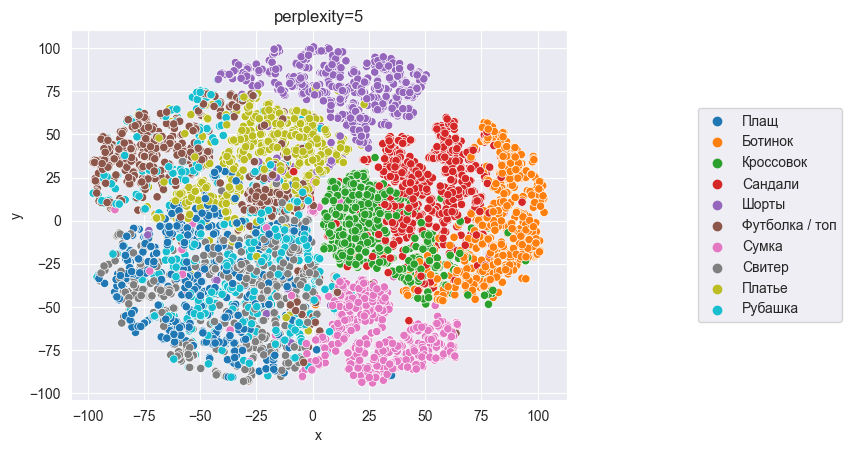

In [128]:
draw_plot(5)
# draw_plot(25)
# draw_plot(50)

In [135]:
import umap

In [136]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)
um = dict()
for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])] = (umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(data_reshaped))

AttributeError: module 'umap' has no attribute 'UMAP'